# Autoencoders

Kernel PCA is an extension of PCA that uses kernel methods to perform the dimensionality reduction in a non-linear manner. It is useful for datasets where the relationship between features is non-linear.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the Iris dataset

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

## Standardize the data (mean=0, variance=1)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Autoencoder mode

## Define the reduced size

In [4]:
input_dim = X_scaled.shape[1]
encoding_dim = 2  # Number of dimensions to reduce to

## Encoder

In [5]:
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)

## Decoder

In [6]:
decoded = Dense(input_dim, activation='sigmoid')(encoded)

## Autoencoder model

In [7]:
autoencoder = Model(input_layer, decoded)

## Encoder model

In [8]:
encoder = Model(input_layer, encoded)

## Compile the autoencoder

In [9]:
autoencoder.compile(optimizer='adam', loss='mse')

# Train the autoencoder

In [10]:
autoencoder.fit(X_scaled, X_scaled, epochs=100, batch_size=16, shuffle=True, verbose=0)

## Use the encoder to transform the data

In [11]:
X_encoded = encoder.predict(X_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


# Plot the encoded (reduced) data

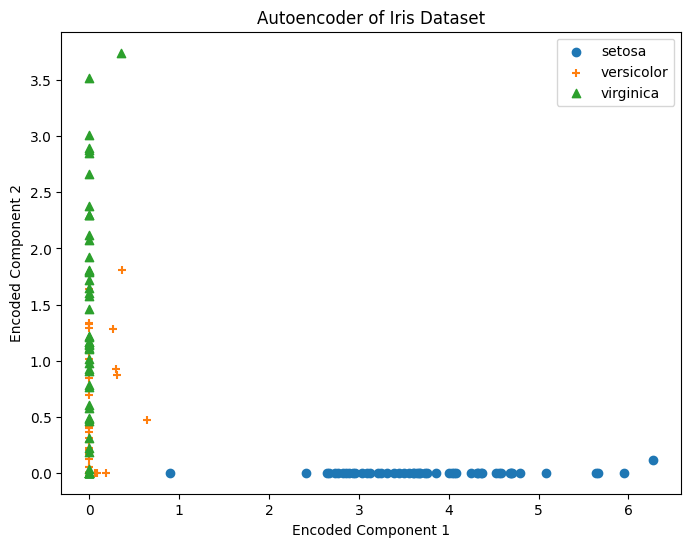

In [12]:
plt.figure(figsize=(8, 6))
markers = ['o', '+', '^']  # 'o' for setosa, '+' for versicolor, '^' for virginica
for target, marker in zip(np.unique(y), markers):
  plt.scatter(X_encoded[y == target, 0], X_encoded[y == target, 1], label=iris.target_names[target], marker=marker)
plt.xlabel('Encoded Component 1')
plt.ylabel('Encoded Component 2')
plt.legend()
plt.title('Autoencoder of Iris Dataset')
plt.show()